In [6]:
# IMPORT NEEDED PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np

In [7]:
# READ FILE AND DROP ID, REPLACE ? WITH -99999
df = pd.read_csv("breast-cancer-wisconsin.data.txt")
df.drop(['id'],1, inplace = True)
df.replace('?', -99999, inplace=True)

df.head()

,clump_thickness,uni_cell_size,uni_cell_shape,marg_adhesion,epithelial_size,bare_nuclei,bland_chromatin,Normal_Nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
# ASSIGN CLASSES AND LABELS THEN SPLIT THE DATA BETWEEN TESTING AND TRAINING DATA
X = np.array(df.drop('class',1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

[0.97857142857142854, 0.94999999999999996, 0.97142857142857142, 0.9642857142857143, 0.98571428571428577, 0.9642857142857143, 0.97857142857142854, 0.97857142857142854, 0.97857142857142854, 0.97857142857142854, 0.97857142857142854, 0.9642857142857143, 0.98571428571428577, 0.97857142857142854, 0.98571428571428577, 0.97142857142857142, 0.97857142857142854, 0.97857142857142854, 0.97857142857142854, 0.97857142857142854, 0.97857142857142854, 0.97857142857142854, 0.97857142857142854, 0.97857142857142854]


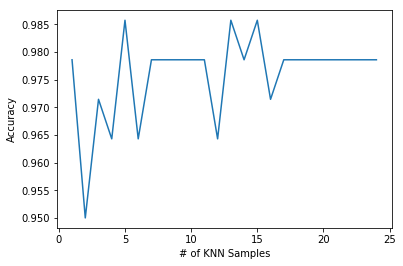

In [9]:
# knn = KNeighborsClassifier(n_neighbors = 11)
import matplotlib.pyplot as plt
%matplotlib inline

scores = []
myrange = range(1,25)

for k in myrange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,pred))

print(scores)

plt.plot(myrange, scores)
plt.xlabel("# of KNN Samples")
plt.ylabel("Accuracy")
plt.show()
    


In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy = knn.score(X_test,y_test)
print(accuracy)

0.985714285714


In [23]:
example_data = np.array([
    [3,1,1,6,7,5,4,3,1],
    [6,1,7,6,7,5,4,3,2],
    [3,1,1,6,7,5,4,3,1],
    [4,4,4,6,2,5,4,3,2], 
])

example_data = example_data.reshape(len(example_data),-1)
predictions = knn.predict(example_data)
# print(predictions)

for prediction in predictions:
    if(prediction == 2):
        print(prediction, '- Benign')
    else:
        print(prediction, '- Malignant')

2 - Benign
4 - Malignine
2 - Benign
4 - Malignine
